In [ ]:
# sgd, rmsprop, adagrad, mini_batch_sgd, adadelta, adam - dataset minist

In [13]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# normalization
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

print("MNIST dataset loaded and preprocessed.")
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

MNIST dataset loaded and preprocessed.
x_train shape: (60000, 28, 28)
y_train shape: (60000, 10)
x_test shape: (10000, 28, 28)
y_test shape: (10000, 10)


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

def create_model(input_shape):
    """Creates a simple Sequential model for MNIST classification."""
    model = Sequential([
        Flatten(input_shape=input_shape),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(num_classes, activation='softmax')
    ])
    return model


In [15]:
from tensorflow.keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam

optimizer_sgd = SGD()
optimizer_rmsprop = RMSprop()
optimizer_adagrad = Adagrad()
optimizer_adadelta = Adadelta()
optimizer_adam = Adam()

print("Optimizer instances created:")
print(f"SGD: {optimizer_sgd}")
print(f"RMSprop: {optimizer_rmsprop}")
print(f"Adagrad: {optimizer_adagrad}")
print(f"Adadelta: {optimizer_adadelta}")
print(f"Adam: {optimizer_adam}")

Optimizer instances created:
SGD: <keras.src.optimizers.sgd.SGD object at 0x793de148b3d0>
RMSprop: <keras.src.optimizers.rmsprop.RMSprop object at 0x793ddfff3990>
Adagrad: <keras.src.optimizers.adagrad.Adagrad object at 0x793de1487f90>
Adadelta: <keras.src.optimizers.adadelta.Adadelta object at 0x793de1450650>
Adam: <keras.src.optimizers.adam.Adam object at 0x793de13ca290>


In [ ]:
optimizers = [
    ('SGD', optimizer_sgd),
    ('RMSprop', optimizer_rmsprop),
    ('Adagrad', optimizer_adagrad),
    ('Adadelta', optimizer_adadelta),
    ('Adam', optimizer_adam)
]

epochs = 10
batch_size = 64

history_dict = {}
evaluation_dict = {}

for name, optimizer in optimizers:
    print(f"\nTraining with {name} optimizer...")

    # model for each optim
    model = create_model((28, 28))

    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        verbose=0)

    history_dict[name] = history.history

    loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
    evaluation_dict[name] = {'loss': loss, 'accuracy': accuracy}

    print(f"{name} - Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

print("\nTraining and evaluation complete for all optimizers.")


Training with SGD optimizer...
SGD - Test Loss: 0.2090, Test Accuracy: 0.9412

Training with RMSprop optimizer...
RMSprop - Test Loss: 0.0713, Test Accuracy: 0.9800

Training with Adagrad optimizer...
Adagrad - Test Loss: 0.3775, Test Accuracy: 0.9023

Training with Adadelta optimizer...
Adadelta - Test Loss: 1.4638, Test Accuracy: 0.6960

Training with Adam optimizer...
Adam - Test Loss: 0.0686, Test Accuracy: 0.9802

Training and evaluation complete for all optimizers.


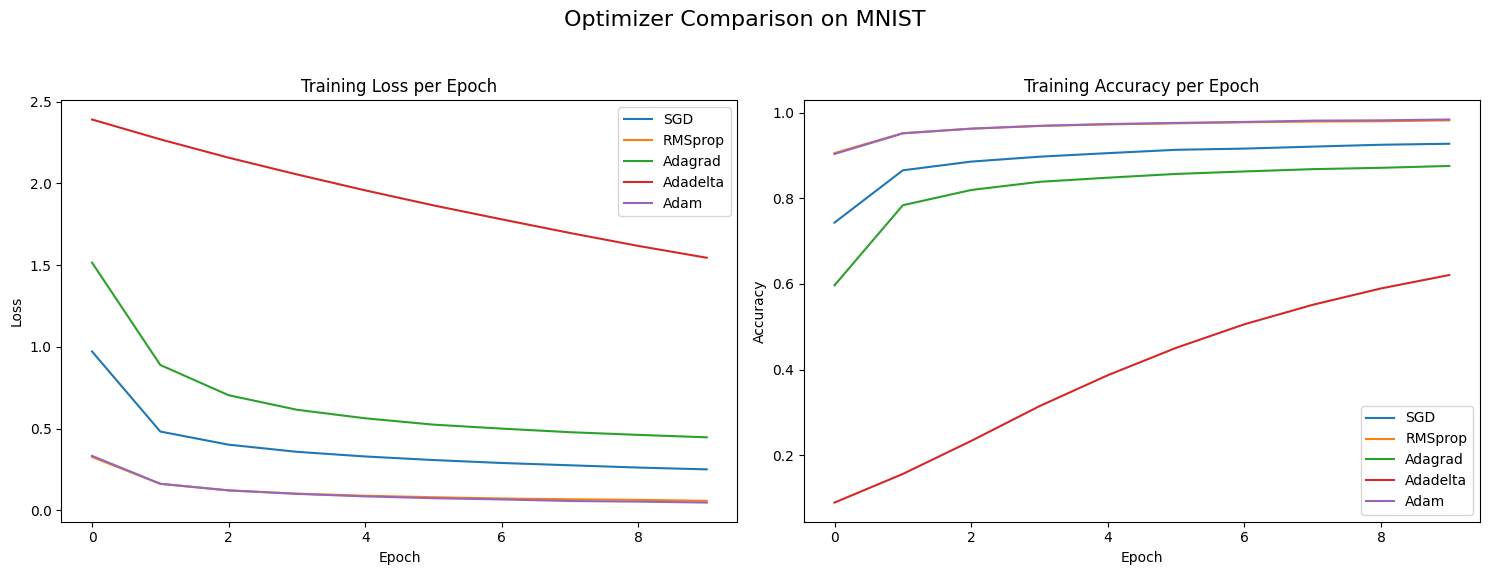


--- Optimizer Evaluation Results ---
Optimizer  | Test Loss  | Test Accuracy
-----------------------------------
SGD        | 0.2090     | 0.9412    
RMSprop    | 0.0713     | 0.9800    
Adagrad    | 0.3775     | 0.9023    
Adadelta   | 1.4638     | 0.6960    
Adam       | 0.0686     | 0.9802    


In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

ax1 = axes[0]
for name, history in history_dict.items():
    ax1.plot(history['loss'], label=name)

ax2 = axes[1]
for name, history in history_dict.items():
    ax2.plot(history['accuracy'], label=name)

ax1.set_title('Training Loss per Epoch')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')

ax2.set_title('Training Accuracy per Epoch')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')

fig.suptitle('Optimizer Comparison on MNIST', fontsize=16)

ax1.legend()
ax2.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

print("\n--- Optimizer Evaluation Results ---")
print("{:<10} | {:<10} | {:<10}".format("Optimizer", "Test Loss", "Test Accuracy"))
print("-" * 35)
for name, metrics in evaluation_dict.items():
    print("{:<10} | {:<10.4f} | {:<10.4f}".format(name, metrics['loss'], metrics['accuracy']))